## Analysis of the results of experiment 1 on Molmo: Cross-Modal Probability Analysis

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folders = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

all_dfs = []
for i, folder in enumerate(folders, start=1):
    file_path = os.path.join(folder, 'molmo_results.csv')
    df = pd.read_csv(file_path)
    df['run'] = f"Run {i}"
    all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)

In [3]:
combined_df['congruent'] = combined_df['congruent'].astype(bool)

print(combined_df.groupby(['run', 'congruent'])['probability'].describe())

                  count       mean        std   min    25%   50%   75%   max
run    congruent                                                            
Run 1  False       68.0  68.823529  18.481892  25.0  55.00  75.0  85.0  95.0
       True        68.0  71.235294  17.305092  30.0  60.00  75.0  85.0  95.0
Run 10 False       68.0  67.558824  18.785023  25.0  50.00  75.0  85.0  95.0
       True        68.0  71.941176  17.597390  30.0  60.00  75.0  85.0  95.0
Run 2  False       68.0  64.529412  19.103388   5.0  50.00  65.0  85.0  95.0
       True        68.0  69.779412  16.088232  30.0  60.00  75.0  85.0  95.0
Run 3  False       68.0  67.205882  20.714519   5.0  53.75  75.0  85.0  95.0
       True        68.0  72.352941  16.478629   5.0  72.50  75.0  85.0  95.0
Run 4  False       68.0  68.470588  19.275280   5.0  55.00  75.0  85.0  95.0
       True        68.0  68.294118  17.813343  35.0  50.00  75.0  85.0  95.0
Run 5  False       68.0  67.397059  20.750932  20.0  53.75  75.0  85.0  95.0

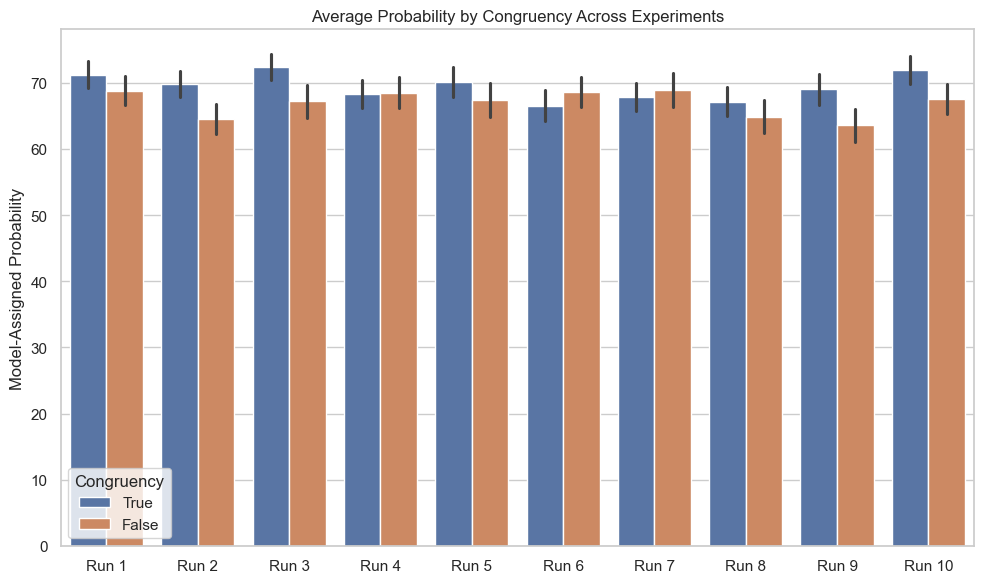

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x="run", y="probability", hue="congruent", hue_order=[True, False], errorbar="se")
plt.title("Average Probability by Congruency Across Experiments")
plt.ylabel("Model-Assigned Probability")
plt.xlabel("")
plt.legend(title="Congruency")
plt.tight_layout()
plt.show()

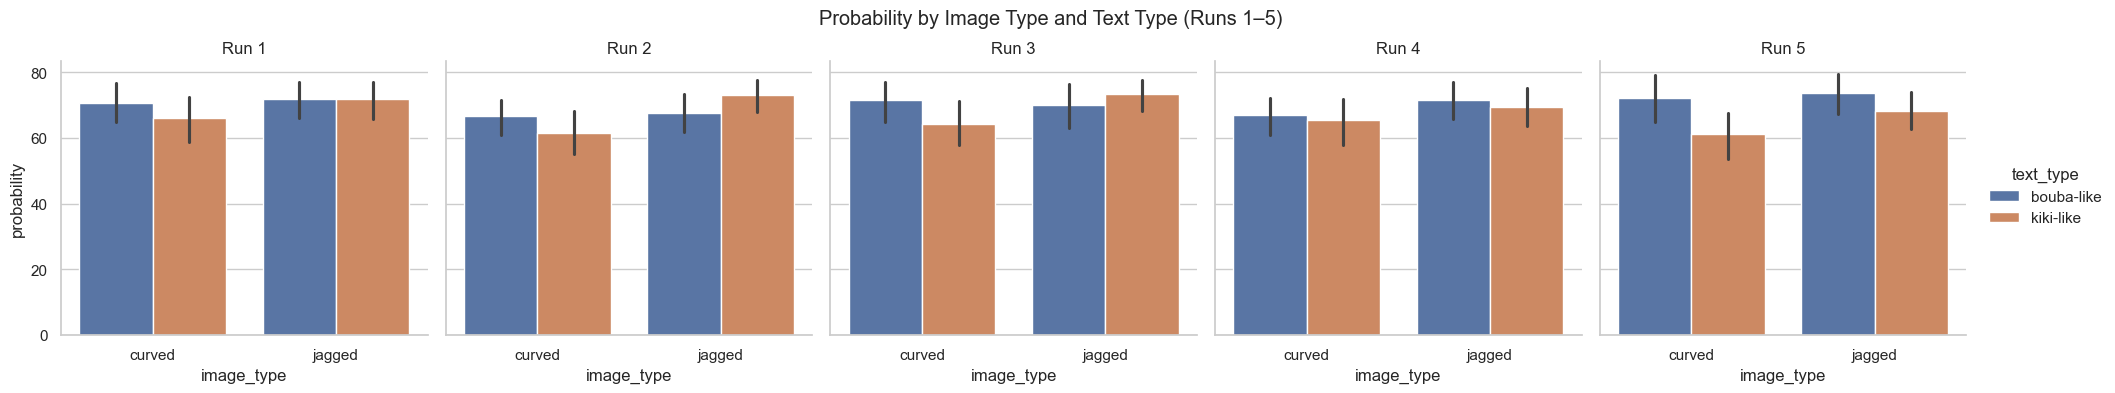

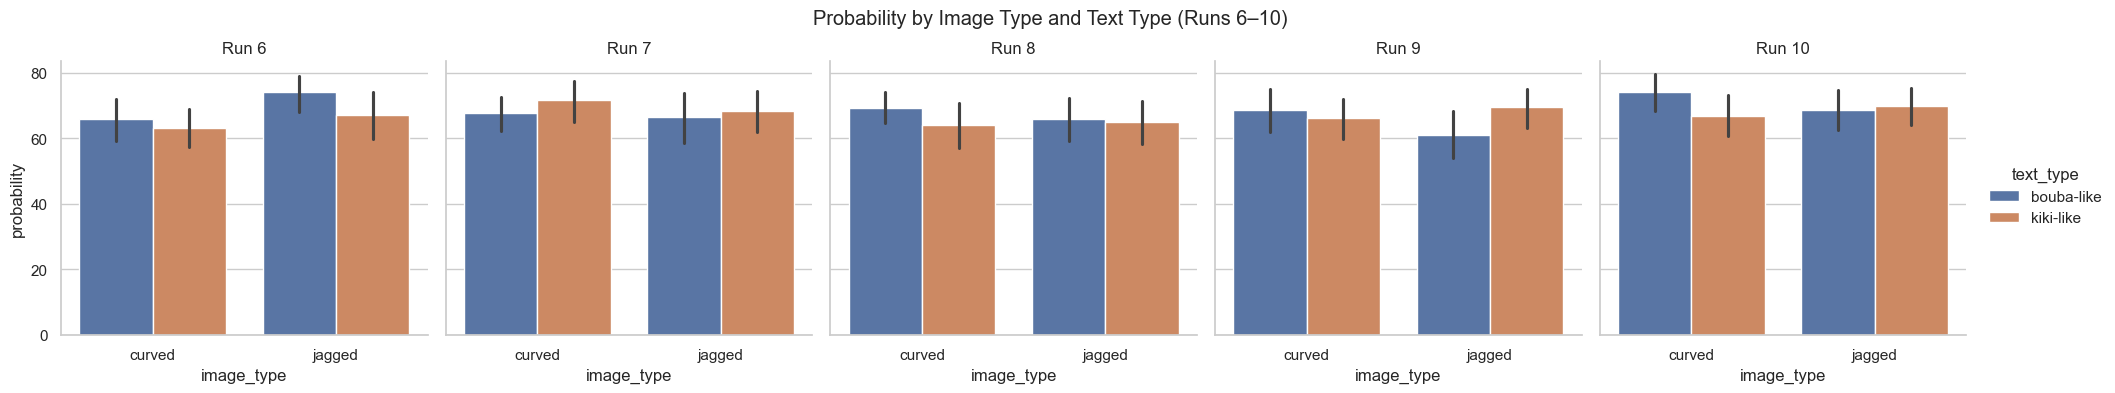

In [5]:
df_first_half = combined_df[combined_df['run'].isin([f"Run {i}" for i in range(1, 6)])]
df_second_half = combined_df[combined_df['run'].isin([f"Run {i}" for i in range(6, 11)])]

g1 = sns.catplot(
    data=df_first_half,
    x="image_type", y="probability", hue="text_type",
    kind="bar", col="run", height=4, aspect=1
)
g1.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g1.fig.suptitle("Probability by Image Type and Text Type (Runs 1–5)")
plt.show()

g2 = sns.catplot(
    data=df_second_half,
    x="image_type", y="probability", hue="text_type",
    kind="bar", col="run", height=4, aspect=1
)

g2.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g2.fig.suptitle("Probability by Image Type and Text Type (Runs 6–10)")
plt.show()

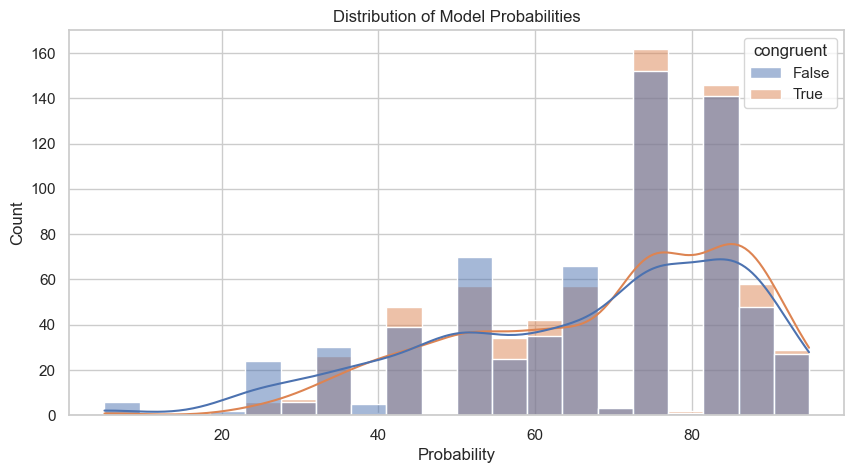

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data=combined_df, x="probability", hue="congruent", kde=True, bins=20)
plt.title("Distribution of Model Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()

Metrics

In [7]:
folders = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

metrics_dfs = []
for i, folder in enumerate(folders, start=1):
    path = os.path.join(folder, "molmo_metrics.csv")
    df = pd.read_csv(path)
    df["run"] = f"{i}"
    metrics_dfs.append(df)

metrics_df = pd.concat(metrics_dfs, ignore_index=True)

In [8]:
metrics_df

,model,congruent_probability,incongruent_probability,effect_strength,overall_bias,curved_bouba_prob,curved_kiki_prob,jagged_bouba_prob,jagged_kiki_prob,n_samples,run
0,molmo,71.235294,68.823529,2.411765,20.029412,70.647059,65.911765,71.735294,71.823529,136,1
1,molmo,69.779412,64.529412,5.250000,17.154412,66.588235,61.500000,67.558824,72.970588,136,2
2,molmo,72.352941,67.205882,5.147059,19.779412,71.500000,64.294118,70.117647,73.205882,136,3
3,molmo,68.294118,68.470588,-0.176471,18.382353,67.058824,65.352941,71.588235,69.529412,136,4
4,molmo,70.117647,67.397059,2.720588,18.757353,71.970588,61.264706,73.529412,68.264706,136,5
5,molmo,66.558824,68.588235,-2.029412,17.573529,65.970588,63.029412,74.147059,67.147059,136,6
6,molmo,67.852941,68.897059,-1.044118,18.375000,67.529412,71.500000,66.294118,68.176471,136,7
7,molmo,67.147059,64.882353,2.264706,16.014706,69.323529,63.852941,65.911765,64.970588,136,8
8,molmo,68.985294,63.544118,5.441176,16.264706,68.529412,66.088235,61.000000,69.441176,136,9
9,molmo,71.941176,67.558824,4.382353,19.750000,74.000000,66.617647,68.500000,69.882353,136,10


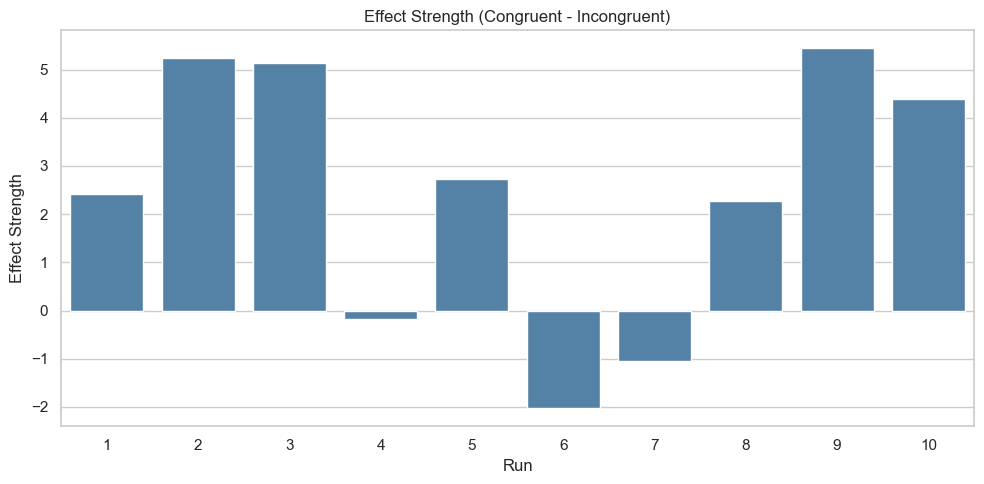

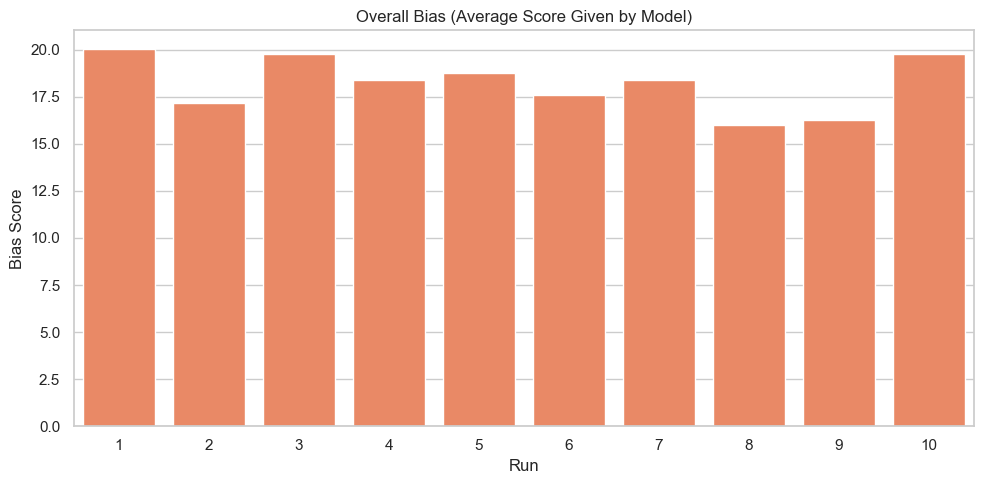

In [9]:
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x="run", y="effect_strength", color="steelblue")
plt.title("Effect Strength (Congruent - Incongruent)")
plt.ylabel("Effect Strength")
plt.xlabel("Run")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x="run", y="overall_bias", color="coral")
plt.title("Overall Bias (Average Score Given by Model)")
plt.xlabel("Run")
plt.ylabel("Bias Score")
plt.tight_layout()
plt.show()

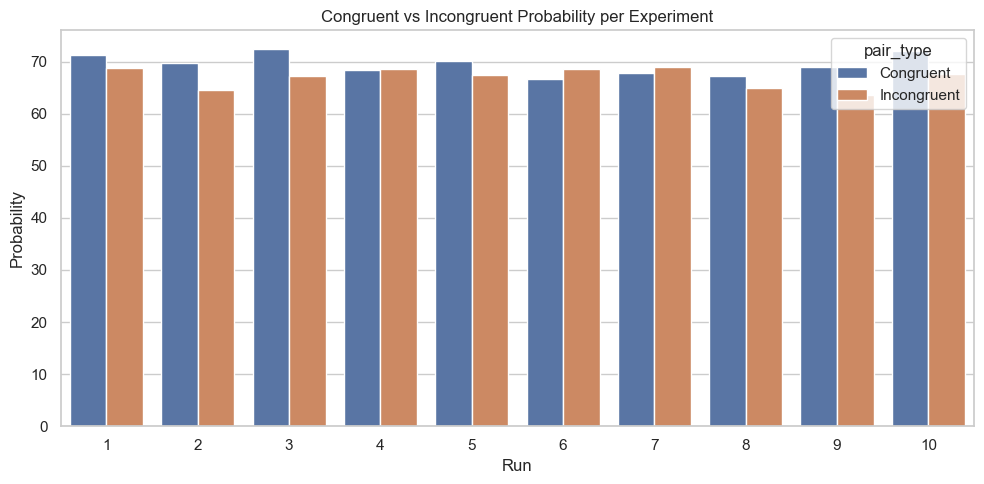

In [10]:
metrics_df_melted = metrics_df.melt(
    id_vars=["run"], 
    value_vars=["congruent_probability", "incongruent_probability"],
    var_name="pair_type", 
    value_name="probability"
)

# Rename pair_type values
label_map = {
    "congruent_probability": "Congruent",
    "incongruent_probability": "Incongruent"
}
metrics_df_melted["pair_type"] = metrics_df_melted["pair_type"].replace(label_map)

# Now plot
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df_melted, x="run", y="probability", hue="pair_type")
plt.title("Congruent vs Incongruent Probability per Experiment")
plt.xlabel("Run")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

Image stats

In [11]:
image_stats_dfs = []
for i, folder in enumerate(folders, start=1):
    path = os.path.join(folder, "image_stats.csv")
    df = pd.read_csv(path)
    df["iteration"] = f"Iter. {i}"
    image_stats_dfs.append(df)

image_stats_df = pd.concat(image_stats_dfs, ignore_index=True)

C:\Users\robkr\AppData\Local\Temp\ipykernel_9564\65902386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=image_stats_df_sorted, y="image_path", x="avg_score", palette="viridis")


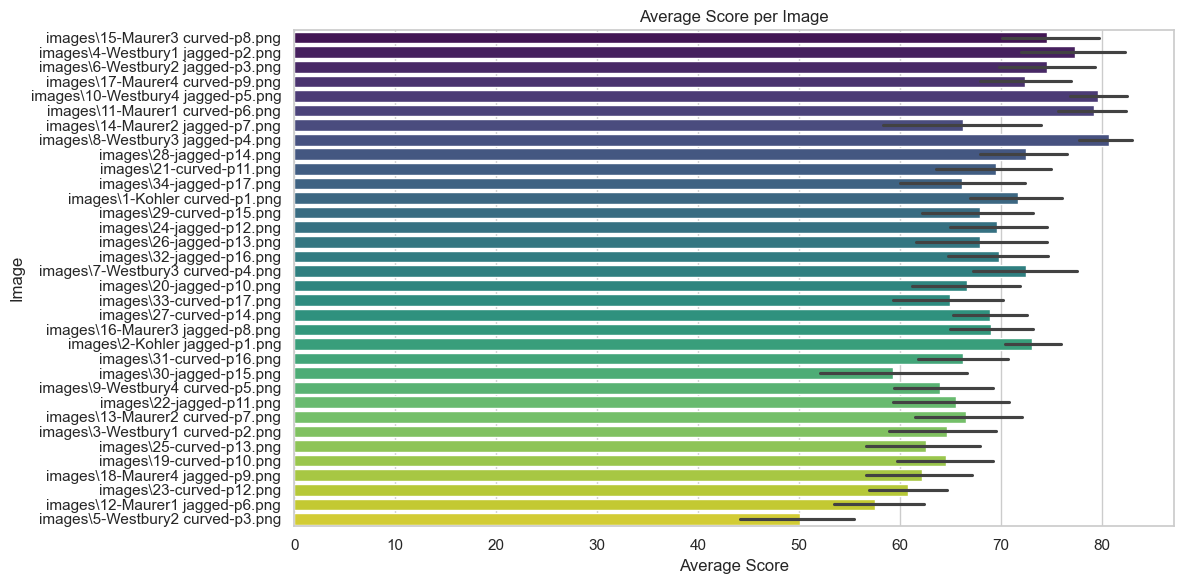

In [12]:
image_stats_df_sorted = image_stats_df.sort_values("avg_score", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=image_stats_df_sorted, y="image_path", x="avg_score", palette="viridis")
plt.title("Average Score per Image")
plt.xlabel("Average Score")
plt.ylabel("Image")
plt.tight_layout()
plt.show()

C:\Users\robkr\AppData\Local\Temp\ipykernel_9564\72884310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=image_stats_df.sort_values("std_dev", ascending=False),


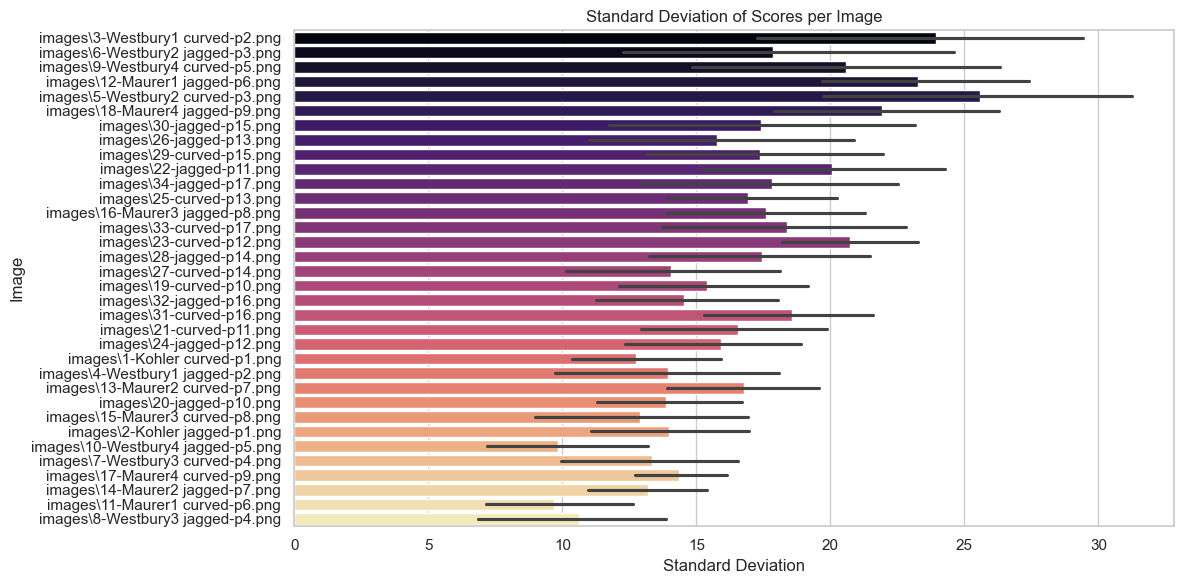

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=image_stats_df.sort_values("std_dev", ascending=False),
            x="std_dev", y="image_path", palette="magma")
plt.title("Standard Deviation of Scores per Image")
plt.xlabel("Standard Deviation")
plt.ylabel("Image")
plt.tight_layout()
plt.show()

C:\Users\robkr\AppData\Local\Temp\ipykernel_9564\3077385530.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=image_stats_df, x="shape", y="avg_score", palette="Set2")


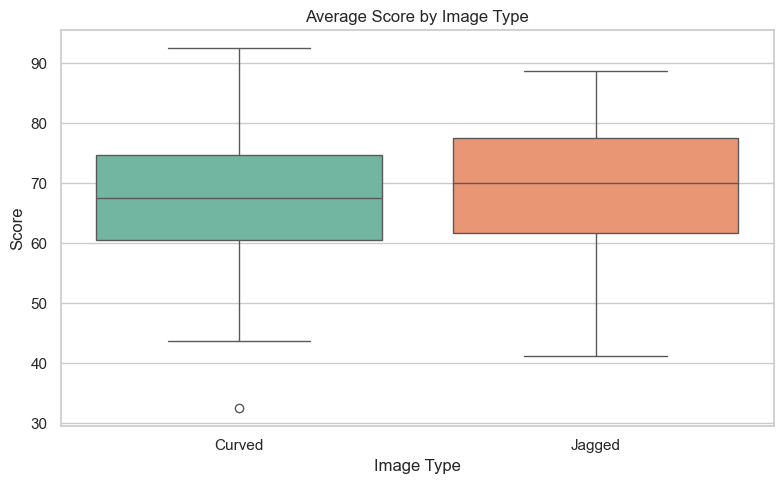

In [14]:
image_stats_df["shape"] = image_stats_df.apply(
    lambda row: "Curved" if row["curved"] else "Jagged", axis=1
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=image_stats_df, x="shape", y="avg_score", palette="Set2")
plt.title("Average Score by Image Type")
plt.ylabel("Score")
plt.xlabel("Image Type")
plt.tight_layout()
plt.show()

In [15]:
metrics_df.to_csv("combined_results/combined_molmo_metrics.csv", index=False)
image_stats_df.to_csv("combined_results/combined_image_stats.csv", index=False)

In [16]:
folders = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
file_name = 'molmo_metrics.csv'

results = []

for folder in folders:
    file_path = os.path.join(folder, file_name)
    
    df = pd.read_csv(file_path)
    
    data = {
        'curved_bouba_prob': df['curved_bouba_prob'].iloc[0],
        'curved_kiki_prob': df['curved_kiki_prob'].iloc[0],
        'jagged_bouba_prob': df['jagged_bouba_prob'].iloc[0],
        'jagged_kiki_prob': df['jagged_kiki_prob'].iloc[0]
    }
    
    results.append(data)

results_df = pd.DataFrame(results)

results_df

,curved_bouba_prob,curved_kiki_prob,jagged_bouba_prob,jagged_kiki_prob
0,70.647059,65.911765,71.735294,71.823529
1,66.588235,61.500000,67.558824,72.970588
2,71.500000,64.294118,70.117647,73.205882
3,67.058824,65.352941,71.588235,69.529412
4,71.970588,61.264706,73.529412,68.264706
5,65.970588,63.029412,74.147059,67.147059
6,67.529412,71.500000,66.294118,68.176471
7,69.323529,63.852941,65.911765,64.970588
8,68.529412,66.088235,61.000000,69.441176
9,74.000000,66.617647,68.500000,69.882353


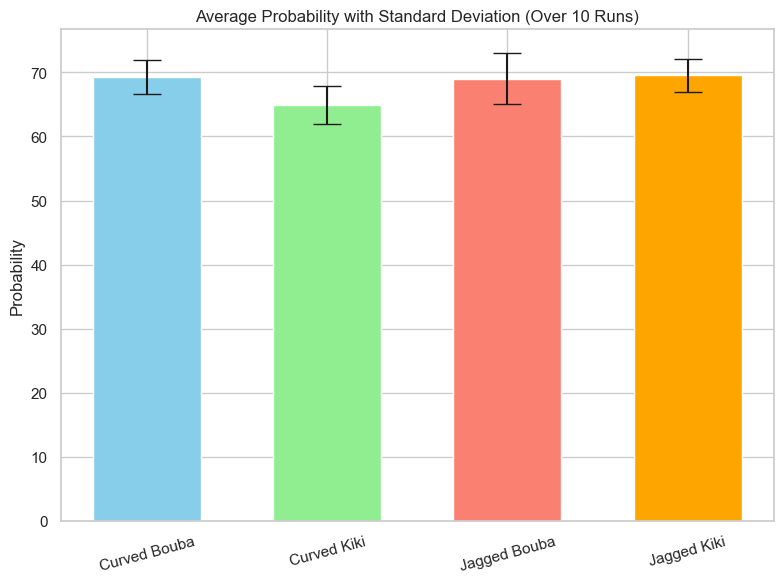

In [17]:
import numpy as np

data = {
    'curved_bouba_prob': [70.647059, 66.588235, 71.5, 67.058824, 71.970588, 65.970588, 67.529412, 69.323529, 68.529412, 74.0],
    'curved_kiki_prob': [65.911765, 61.5, 64.294118, 65.352941, 61.264706, 63.029412, 71.5, 63.852941, 66.088235, 66.617647],
    'jagged_bouba_prob': [71.735294, 67.558824, 70.117647, 71.588235, 73.529412, 74.147059, 66.294118, 65.911765, 61.0, 68.5],
    'jagged_kiki_prob': [71.823529, 72.970588, 73.205882, 69.529412, 68.264706, 67.147059, 68.176471, 64.970588, 69.441176, 69.882353]
}

df = pd.DataFrame(data)

# Calculate means and standard deviations
means = df.mean()
stds = df.std()

# Bar plot
categories = ['Curved Bouba', 'Curved Kiki', 'Jagged Bouba', 'Jagged Kiki']
x = np.arange(len(categories))
width = 0.6

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x, means, yerr=stds, capsize=10, width=width, color=['skyblue', 'lightgreen', 'salmon', 'orange'])

ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=15)
ax.set_ylabel('Probability')
ax.set_title('Average Probability with Standard Deviation (Over 10 Runs)')

plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
from scipy.stats import ttest_ind, shapiro, levene
import os

df = combined_df.copy()

df["probability"] = df["probability"].astype(float)

def test_model_congruency(df, model_name):
    model_df = df[df["model"] == model_name]
    congruent_probs = model_df.loc[model_df["congruent"] == True, "probability"].dropna()
    incongruent_probs = model_df.loc[model_df["congruent"] == False, "probability"].dropna()

    # Test for normality
    p_c = shapiro(congruent_probs).pvalue
    p_i = shapiro(incongruent_probs).pvalue
    normal = (p_c > 0.05) and (p_i > 0.05)

    # Test for equal variance
    p_levene = levene(congruent_probs, incongruent_probs).pvalue
    equal_var = p_levene > 0.05

    # Choose t-test
    t_result = ttest_ind(congruent_probs, incongruent_probs, equal_var=equal_var)
    test_name = "Student's t-test" if normal and equal_var else "Welch's t-test"

    return {
        "model": model_name,
        "test_used": test_name,
        "p_value": t_result.pvalue,
        "t_statistic": t_result.statistic,
        "congruent_mean": congruent_probs.mean(),
        "incongruent_mean": incongruent_probs.mean(),
        "normality_passed": normal,
        "equal_variance_passed": equal_var,
        "n_congruent": len(congruent_probs),
        "n_incongruent": len(incongruent_probs)
    }

# Run for each model
results = []
for model in df["model"].unique():
    results.append(test_model_congruency(df, model))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

results_df.head()

,model,test_used,p_value,t_statistic,congruent_mean,incongruent_mean,normality_passed,equal_variance_passed,n_congruent,n_incongruent
0,molmo,Welch's t-test,0.017212,2.385111,69.426471,66.989706,False,False,680,680
